Below are experiments using Matplotlib to draw a representation of the RH board.

Farther down are experiments using svgwriter to create SVG images.

In [82]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines

    

In [83]:
t = np.zeros((6,6),dtype=int)
t[3,4:6] = 5
t[2:4,3] = 7
t

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 7, 0, 0],
       [0, 0, 0, 7, 5, 5],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [12]:
black =  [1,1,1]
red = [1,0,0]
white = [0,0,0]

In [13]:
a =np.array([[156, 138, 156],
             [1300, 137, 156],
             [138, 138, 1300],
             [137, 137, 137]])

ca = np.array([[156,200,200,200],
               [138,170,255,245],
               [137,208,130,40],
               [1300,63,165,76]])

u, ind = np.unique(a, return_inverse=True)

c = ca[ca[:,0].argsort()][:,1:]/255.

b =  np.moveaxis(c[ind][:,:,np.newaxis],1,2).reshape((a.shape[0],a.shape[1],3))
b

array([[[ 0.78431373,  0.78431373,  0.78431373],
        [ 0.66666667,  1.        ,  0.96078431],
        [ 0.78431373,  0.78431373,  0.78431373]],

       [[ 0.24705882,  0.64705882,  0.29803922],
        [ 0.81568627,  0.50980392,  0.15686275],
        [ 0.78431373,  0.78431373,  0.78431373]],

       [[ 0.66666667,  1.        ,  0.96078431],
        [ 0.66666667,  1.        ,  0.96078431],
        [ 0.24705882,  0.64705882,  0.29803922]],

       [[ 0.81568627,  0.50980392,  0.15686275],
        [ 0.81568627,  0.50980392,  0.15686275],
        [ 0.81568627,  0.50980392,  0.15686275]]])

In [16]:
u,ind

(array([ 137,  138,  156, 1300]),
 array([2, 1, 2, 3, 0, 2, 1, 1, 3, 0, 0, 0], dtype=int64))

In [17]:
t

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 7, 0, 0],
       [0, 0, 0, 7, 5, 5],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [25]:
match_7 = np.where(t==7)
np.array(list((zip(match_7[0],match_7[1]))))


array([[2, 3],
       [3, 3]], dtype=int64)

In [29]:
blank_rgb = [211,211,211]
car_pink = [250,211,160]
truck_black = [0,0,0]



In [30]:
t[0]

array([0, 0, 0, 0, 0, 0])

ValueError: invalid literal for int() with base 10: 'hello'

In [35]:
type(t)

numpy.ndarray

In [39]:
np.array( np.array([blank_rgb]*6) * 1)

array([[211, 211, 211],
       [211, 211, 211],
       [211, 211, 211],
       [211, 211, 211],
       [211, 211, 211],
       [211, 211, 211]])

In [82]:
empty_board = np.array([211]*(6*6*3),dtype='B').reshape(6,6,3)
empty_board[3,3] = [0,0,0]
#empty_board

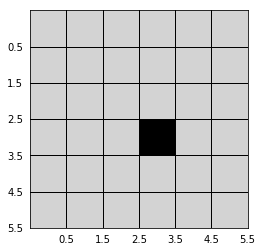

In [164]:
plt.imshow(empty_board,aspect='equal')
ax = plt.gca()
ax.set_xticks([.5,1.5,2.5,3.5,4.5,5.5])
#ax.set_xticklabels(['0','1','2','3','4','5'])
ax.set_yticks([.5,1.5,2.5,3.5,4.5,5.5])
#ax.minor_ticks_on
# test a plain-ol-line
#line = lines.Line2D([1,1], [0, 6],lw=2, color='black', axes=ax)
#ax.add_line(line)
for tic in ax.xaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False
    
for tic in ax.yaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False
    
plt.grid(color='black',linewidth=1)
plt.show()

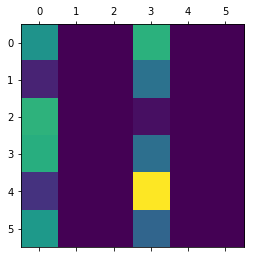

In [165]:
# Make a 9x9 grid...
nrows, ncols = 6,6
image = np.zeros(nrows*ncols)

# Set every other cell to a random number (this would be your data)
image[::3] = np.random.random(nrows*ncols //3)

# Reshape things into a 9x9 grid.
image = image.reshape((nrows, ncols))

row_labels = range(nrows)
col_labels = range(ncols)
plt.matshow(image)
plt.xticks(range(ncols), col_labels)
plt.yticks(range(nrows), row_labels)

plt.show()

In [132]:
image[0]

array([ 0.65763165,  0.        ,  0.62892623,  0.        ,  0.57250474,
        0.        ,  0.18414462,  0.        ,  0.94251655])

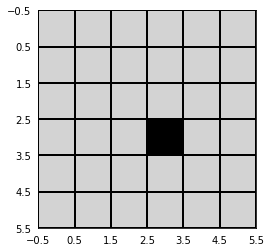

In [166]:
from matplotlib import colors
import numpy as np

data = np.random.rand(10, 10) * 20

# create discrete colormap
cmap = colors.ListedColormap(['red', 'blue'])
bounds = [0,10,20]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots()
#ax.imshow(data, cmap=cmap, norm=norm)
ax.imshow(empty_board)
# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(-.5, 6, 1));
ax.set_yticks(np.arange(-.5, 6, 1));

for tic in ax.xaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False
    
for tic in ax.yaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False

plt.show()

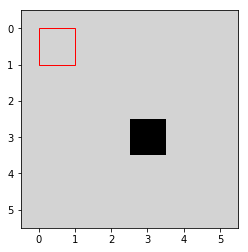

In [155]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

#im = np.array(Image.open('stinkbug.png'), dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)
# Display the image
ax.imshow(empty_board)

plot([x1, x2], [y1, y2], color='k', linestyle='-', linewidth=2)

# Create a Rectangle patch
rect = patches.Rectangle((0,0),1,1,linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()
plt.

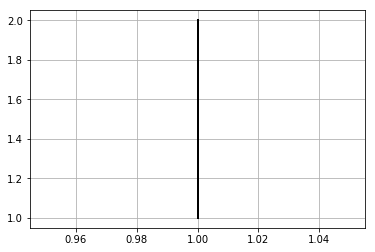

In [176]:
plt.plot([1,1], [1,2], color='k', linestyle='-', linewidth=2)
plt.grid()
plt.show()

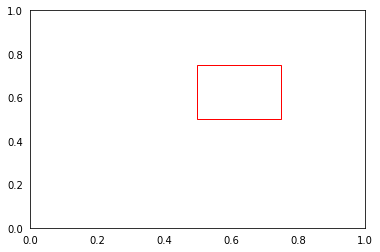

In [172]:
fig,ax = plt.subplots(1)

#ax.
rect = patches.Rectangle((.5,.5),.25,.25,linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

#ax.grid(b=None)
for tic in ax.xaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False
    
for tic in ax.yaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False

plt.show()


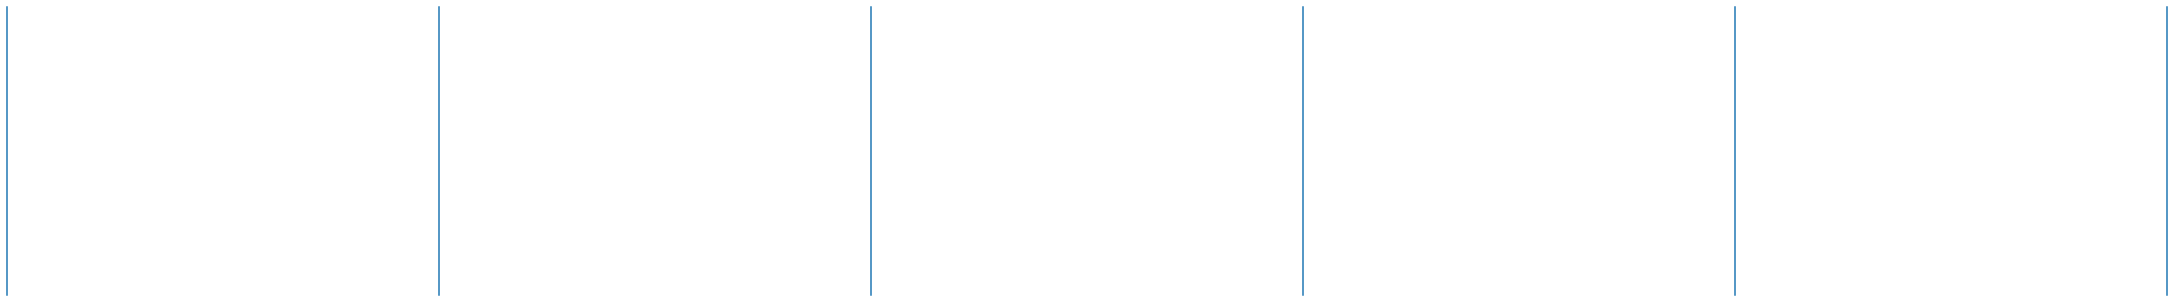

In [201]:



#fig = plt.figure(figsize = (1,1))
fig = plt.figure()

lines = [ lines.Line2D([x,x],[0,1],transform=fig.transFigure, figure=fig) for x in range(6)]
#l1 = lines.Line2D([0, 0], [0, 1] ,transform=fig.transFigure, figure=fig)

#l2 = lines.Line2D([1, 1], [0,1], transform=fig.transFigure, figure=fig)

fig.lines.extend(lines)

plt.show()

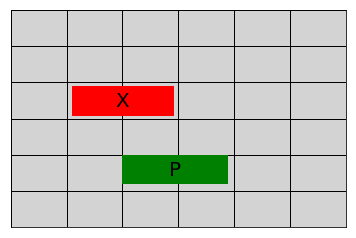

In [254]:
ax = plt.subplot(111) 

from matplotlib.patches import Rectangle


#p = FancyArrow(0.05, 0.5, 0.2, 0.0, width=0.01, 
#               length_includes_head=False, 
#               head_width=None, head_length=None, 
#               shape='full', overhang=0, 
##               head_starts_at_zero=False, 
#              transform=ax.figure.transFigure, 
#               clip_on=False) 

#p = Rectangle( (.5,.5),.5,.5,facecolor=(211/255.0,211/255.0,211/255.0),edgecolor=(0,0,0))

#ax.add_patch(p) 

#for x in range(6):
#    ax.add_patch( Rectangle( (x/6,x/6),1/6,1/6, facecolor=(211/255.0,211/255.0,211/255.0),edgecolor=(0,0,0)))

def add_car(x,y,ax):
    
    border = 1/60.0
    
    # start with horizontal cars only
    x = x * 1/6.0 
    y = y * 1/6.0 
    height = 1/6.0 - 2*border
    width = 2/6.0 -border
    
    r = Rectangle( (x,y), width, height, facecolor = 'green')
    
    ax.add_patch(r)
        
    c_x = x + width/2.0 
    c_y = y + height/2.0

    ax.text(c_x,c_y,'P',horizontalalignment='center', verticalalignment='center',fontsize=20, color='black')

    
    
ax.invert_yaxis()
for row in range(6):
    for col in range(6):
        ax.add_patch( Rectangle( (row/6,col/6) ,1/6,1/6,facecolor=(211/255.0,211/255.0,211/255.0),edgecolor=(0,0,0)))

space_width = 1/6
border = 1/60 

ax.add_patch(Rectangle( (1/6+border,2/6+border),2/6-2*border,1/6-2*border , color='red' )  )
ax.grid(False)
# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.text(1/6+border + 1/6-border ,2/6+border + 1/12 - border, 'X', horizontalalignment='center', verticalalignment='center',fontsize=20, color='black')
add_car(2,4,ax)
#ax.axis('off')
plt.show()

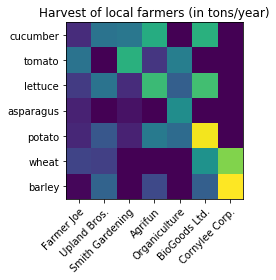

In [130]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_number = 2

vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
#for i in range(len(vegetables)):
#    for j in range(len(farmers)):
#        text = ax.text(j, i, harvest[i, j],
#                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

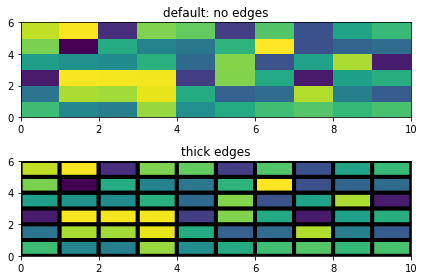

In [49]:
Z = np.random.rand(6, 10)

fig, (ax0, ax1) = plt.subplots(2, 1)

c = ax0.pcolor(Z)
ax0.set_title('default: no edges')

c = ax1.pcolor(Z, edgecolors='k', linewidths=4)
ax1.set_title('thick edges')

fig.tight_layout()
plt.show()

In [53]:
c

In [67]:
ax

In [5]:
from IPython.display import SVG
from IPython.display import HTML

In [257]:
HTML("""<?xml version="1.0"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
  "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">

<svg width="360" height="360"
  xmlns="http://www.w3.org/2000/svg" >
<title>Cat</title>
<desc>Stick Figure of a Cat</desc>

<!-- outer rectangle -->
  <rect x="10" y="70" width="300" height="300"
    style="fill: #D3D3D3;
      stroke: black; stroke-width: 2; stroke-opacity: 0.5;"/>
 
 <line x1="60" y1="70" x2="60" y2="370" style="stroke: black;"/>
 <line x1="110" y1="70" x2="110" y2="370" style="stroke: black;"/>
 <line x1="160" y1="70" x2="160" y2="370" style="stroke: black;"/>
 <line x1="210" y1="70" x2="210" y2="370" style="stroke: black;"/>
 <line x1="260" y1="70" x2="260" y2="370" style="stroke: black;"/>
 
 <line x1="10" y1="120" x2="310" y2="120" style="stroke: black;"/>
 <line x1="10" y1="170" x2="310" y2="170" style="stroke: black;"/>
 <line x1="10" y1="220" x2="310" y2="220" style="stroke: black;"/>
 <line x1="10" y1="270" x2="310" y2="270" style="stroke: black;"/>
 <line x1="10" y1="320" x2="310" y2="320" style="stroke: black;"/>
 
 <rect x="61" y="171" width="98" height="48" rx="5"
    style="stroke: none; fill: red;"/>
    
 <rect x="61" y="271" width="98" height="48" rx="5"
    style="stroke: none; fill: green"/>

 <text x="111" y="195" style="alignment-baseline:middle;font-size:18pt;font-weight:bold;text-anchor: middle">X</text>

</svg>""")

In [1]:
import svgwrite

In [78]:

dwg = svgwrite.Drawing('username.svg', profile='tiny', width=180, height=180)

shapes = dwg.add(dwg.g(id='shapes'))

dwg.add(dwg.rect(insert=(0,0),size=(180,180),fill='rgb(211,211,211)'))

for x in range(7):
    dwg.add(dwg.line((30*x,0),(30*x,180),stroke='black',stroke_width=2))
    dwg.add(dwg.line((0,30*x),(180,30*x),stroke='black',stroke_width=2))

dwg.add(dwg.rect(insert=(35, 65), size=(50, 20),rx=5,ry=5,fill='red', stroke='red', stroke_width=3))
dwg.add(dwg.text('X',insert=(55,80)))


dwg.add(dwg.rect(insert=(65, 35), size=(50, 20),rx=5,ry=5,fill='green',  stroke_width=3))
dwg.add(dwg.text('Q',insert=(85,50)))



#dwg.add(drawObj.rect(insert=(10, 10), size=(30, 30), rx=None, ry=None,stroke='green')
#drawObj.add(drawObj.line((10, 70), (400, 70), stroke=svgwrite.rgb(0, 0, 0, '%')))
HTML(dwg.tostring())

Now to create dynamic procedure to convert numpry ndarray into svg representation.

In [84]:
t

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 7, 0, 0],
       [0, 0, 0, 7, 5, 5],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [85]:
space_size = 30
board_size = 6*space_size

dwg = svgwrite.Drawing('username.svg', profile='tiny', width=180, height=180)

dwg.add(dwg.rect(insert=(0,0),size=(180,180),fill='rgb(211,211,211)'))

for x in range(7):
    dwg.add(dwg.line((30*x,0),(30*x,180),stroke='black',stroke_width=2))
    dwg.add(dwg.line((0,30*x),(180,30*x),stroke='black',stroke_width=2))
    
HTML(dwg.tostring())

In [86]:
t

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 7, 0, 0],
       [0, 0, 0, 7, 5, 5],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])